In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
spotify = pd.read_csv('./spotify_songs.csv')
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [20]:
#Dauer von Millisekunden in Sekunden umrechnen
spotify['duration_s'] = spotify['duration_ms'] / 1000

# Überprüfen auf fehlende Werte in den Spalten
spotify = spotify.dropna(subset=['duration_s', 'track_popularity'])

print(spotify[['duration_s', 'track_popularity']].head())

   duration_s  track_popularity
0     194.754                66
1     162.600                67
2     176.616                70
3     169.093                60
4     189.052                69


In [22]:
# Popularitätsintervalle
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Erstellen einer neuen Spalte für die Popularitätsgruppe
spotify['popularity_group'] = pd.cut(spotify['track_popularity'], bins=bins, labels=labels, right=False)

# Berechnung des Durchschnitts der Songdauer für jede Gruppe
avg_duration_per_popularity = spotify.groupby('popularity_group')['duration_s'].mean()

print(avg_duration_per_popularity)

popularity_group
0-10      244.987513
10-20     231.687252
20-30     228.778255
30-40     226.320229
40-50     218.585028
50-60     219.680034
60-70     222.201345
70-80     221.264598
80-90     211.693718
90-100    198.244026
Name: duration_s, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_21304\582463867.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_per_popularity = spotify.groupby('popularity_group')['duration_s'].mean()


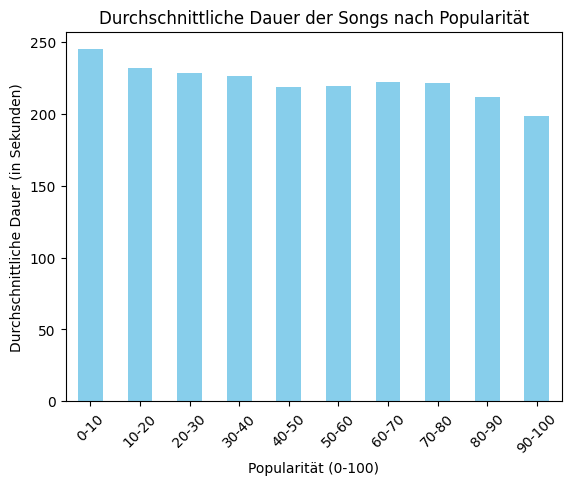

In [30]:
# Balkendiagramm für die durchschnittliche Dauer der Songs pro Popularitätsbereich
avg_duration_per_popularity.plot(kind='bar', color='skyblue')

# Diagrammtitel und Achsenbeschriftungen
plt.title('Durchschnittliche Dauer der Songs nach Popularität')
plt.xlabel('Popularität (0-100)')
plt.ylabel('Durchschnittliche Dauer (in Sekunden)')
plt.xticks(rotation=45)
plt.show()